In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
hrt = pd.read_csv('heart.csv')
hrt.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [3]:
hrt.shape

(918, 12)

In [4]:
hrt.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,914.000000,915,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,723,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.553611,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.424972,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
#Checking null values
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#Filling null values in Age column with average age
hrt['Age'].fillna(np.mean(hrt['Age']), inplace = True)

In [7]:
#Filling null values in Sex column with mode
hrt['Sex'].value_counts()

Sex
M    723
F    192
Name: count, dtype: int64

In [8]:
hrt['Sex'].fillna('M', inplace = True)

## Exploratory Data Analysis

In [9]:
gender = hrt.Sex.value_counts()
gender

Sex
M    726
F    192
Name: count, dtype: int64

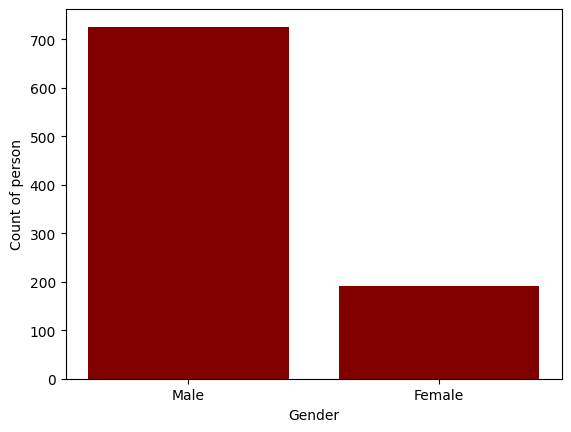

In [10]:
plt.bar(['Male','Female'], gender.values, color = 'Maroon')
plt.xlabel("Gender")
plt.ylabel('Count of person')
plt.show()

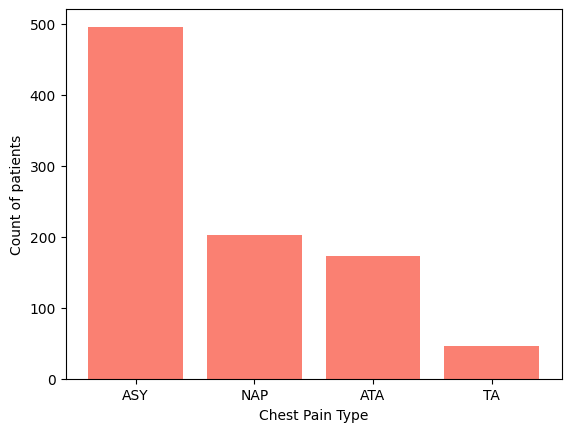

In [11]:
cp = hrt.ChestPainType.value_counts()
plt.bar(cp.index, cp.values, color='Salmon')
plt.xlabel("Chest Pain Type")
plt.ylabel('Count of patients')
plt.show()

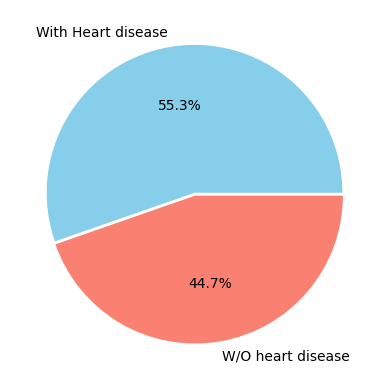

In [12]:
#Heart disease distribution
hd = hrt.HeartDisease.value_counts()
plt.pie(hd.values, labels=["With Heart disease", "W/O heart disease"], autopct = "%0.1f%%",
       explode=[0.01,0.01], colors=['SkyBlue','Salmon'])
plt.show()

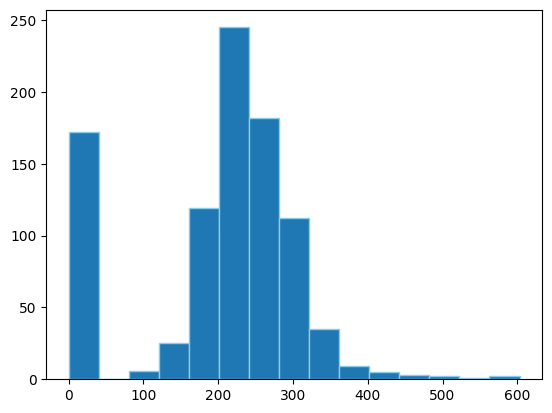

In [13]:
#Distribution of Cholesterol
plt.hist(hrt['Cholesterol'], bins=15, edgecolor = 'Skyblue')
plt.show()

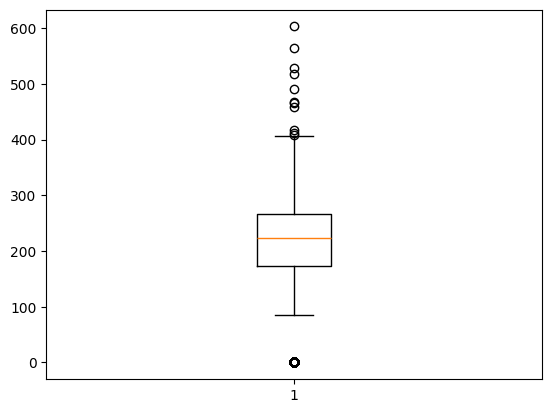

In [14]:
plt.boxplot(hrt['Cholesterol'])
plt.show()

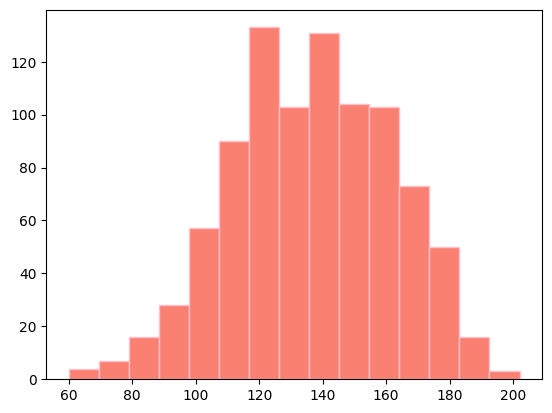

In [15]:
#Distribution of Heart rate
plt.hist(hrt.MaxHR, bins=15, color = 'Salmon', edgecolor = 'Pink')
plt.show()

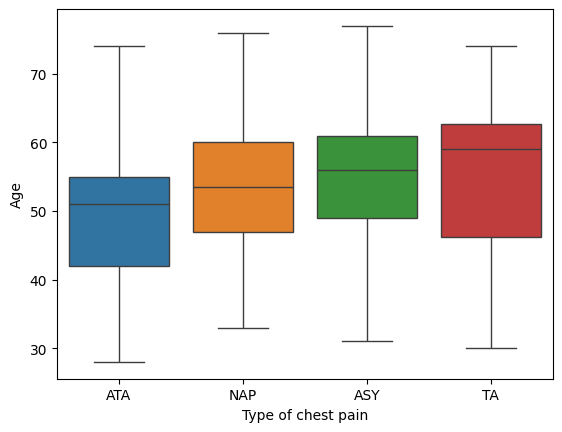

In [16]:
sns.boxplot(x = 'ChestPainType', y='Age', data=hrt, hue = 'ChestPainType')
plt.xlabel('Type of chest pain')
plt.ylabel('Age')
plt.show()

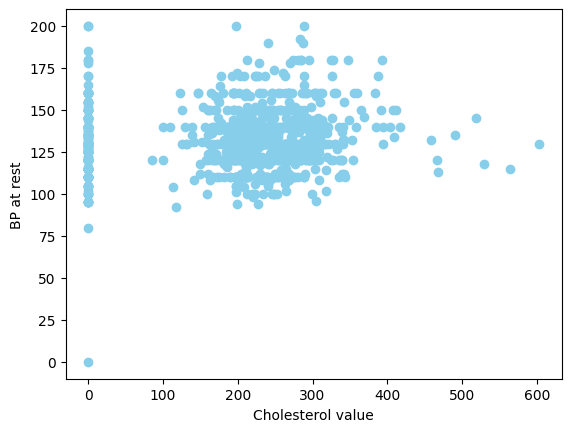

In [17]:
plt.scatter(hrt.Cholesterol, hrt.RestingBP, color = 'SkyBlue')
plt.xlabel('Cholesterol value')
plt.ylabel('BP at rest')
plt.show()

The graph shows that their is no conclusive evidence stating BP changes due to Cholesterol

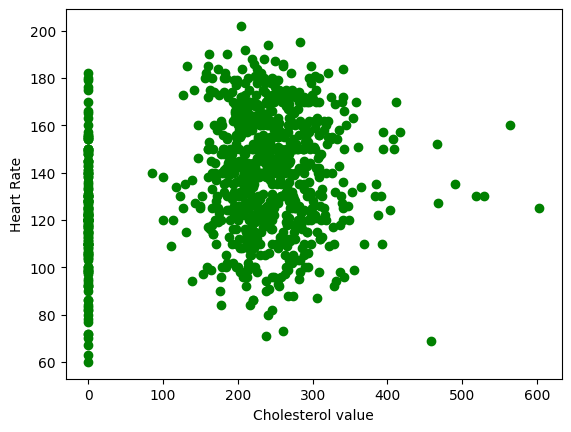

In [18]:
plt.scatter(hrt.Cholesterol, hrt.MaxHR, color = 'Green')
plt.xlabel('Cholesterol value')
plt.ylabel('Heart Rate')
plt.show()

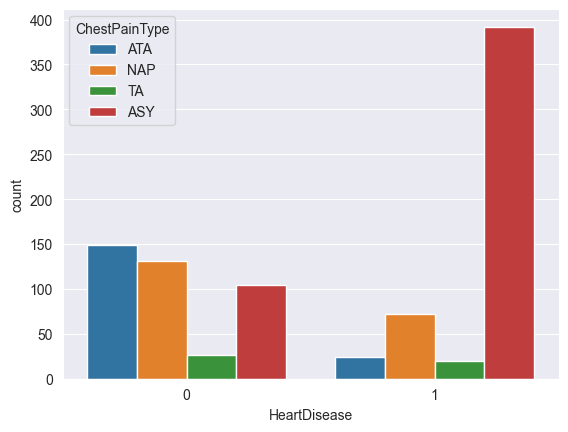

In [19]:
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ChestPainType', data = hrt)
plt.show()

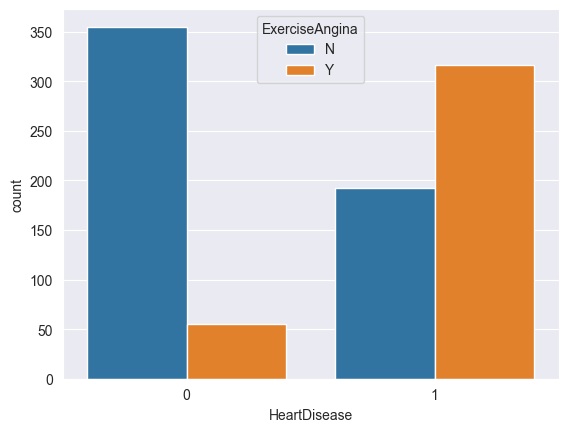

In [20]:
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ExerciseAngina', data = hrt)
plt.show()

In [21]:
hrt.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64

In [22]:
hrt.groupby('HeartDisease')['RestingBP'].mean()

HeartDisease
0    130.180488
1    134.185039
Name: RestingBP, dtype: float64

In [23]:
encode = LabelEncoder()
hrt['Sex'] = encode.fit_transform(hrt['Sex'])
hrt.ChestPainType = encode.fit_transform(hrt.ChestPainType)
hrt.RestingECG = encode.fit_transform(hrt.RestingECG)
hrt.ExerciseAngina = encode.fit_transform(hrt.ExerciseAngina)
hrt.ST_Slope = encode.fit_transform(hrt.ST_Slope)

In [24]:
X = hrt.iloc[: , :-1]
y = hrt.HeartDisease

In [25]:
x_tr, x_te, y_tr, y_te = train_test_split(X,y,test_size=0.20)

In [26]:
model = LogisticRegression()
model.fit(x_tr, y_tr)

LogisticRegression()

In [27]:
y_pr = model.predict(x_te)
print("The accuracy is:", accuracy_score(y_te, y_pr)*100)

The accuracy is: 86.41304347826086


In [28]:
accuracies = []
accuracies.append(accuracy_score(y_te, y_pr)*100)

In [29]:
#Hyper Parameter tunning using grid search CV
max_feat = [0.2,0.5,1.0]
max_dep = [2,3,4,5,6,7]
param_grid = {'max_features':max_feat, 'max_depth':max_dep}

model = DecisionTreeClassifier()
cls = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)

cls.fit(x_tr, y_tr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [0.2, 0.5, 1.0]},
             verbose=2)

In [30]:
#Getting best parameter combination
cls.best_params_

{'max_depth': 4, 'max_features': 1.0}

In [31]:
#Tunning Decision tree with best parameters
model = DecisionTreeClassifier(max_depth=5, max_features=1.0)
model.fit(x_tr, y_tr)
y_pr = model.predict(x_te)
acc = accuracy_score(y_te, y_pr)*100
accuracies.append(acc)

In [32]:
accuracies

[86.41304347826086, 83.15217391304348]

In [33]:
#Applying KNN
k_vals = [1,2,3,4,5,6,7,8,9,10]
accus = []
for i in k_vals:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_tr, y_tr)
    y_pred = model.predict(x_te)
    accus.append(accuracy_score(y_te, y_pred)*100)

In [34]:
accus

[58.152173913043484,
 58.152173913043484,
 64.13043478260869,
 63.04347826086957,
 61.41304347826087,
 61.41304347826087,
 62.5,
 60.86956521739131,
 63.04347826086957,
 64.67391304347827]

In [35]:
#As we get best accuracy for K = 6, use that value for number of neighbors
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)

In [36]:
#Applying SVM
model = SVC(kernel='poly')
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
acc = accuracy_score(y_te, y_pred)*100
accuracies.append(acc)
accuracies

[86.41304347826086, 83.15217391304348, 61.41304347826087, 66.84782608695652]

In [37]:
#Using Naive Bayes
model = GaussianNB()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)
accuracies

[86.41304347826086,
 83.15217391304348,
 61.41304347826087,
 66.84782608695652,
 83.69565217391305]

In [38]:
#Using Ensemble Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)
accuracies

[86.41304347826086,
 83.15217391304348,
 61.41304347826087,
 66.84782608695652,
 83.69565217391305,
 86.41304347826086]

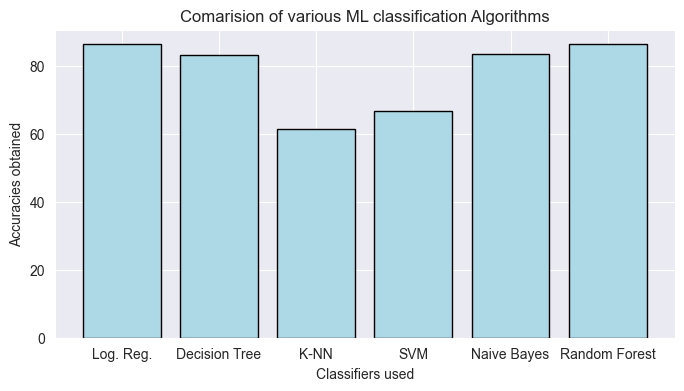

In [39]:
fig = plt.figure(figsize=(8,4))
classifiers = ['Log. Reg.','Decision Tree','K-NN','SVM','Naive Bayes','Random Forest']
plt.bar(classifiers,accuracies, color = 'Lightblue',edgecolor = 'Black')
plt.xlabel("Classifiers used")
plt.ylabel("Accuracies obtained")
plt.title("Comarision of various ML classification Algorithms")
plt.show()